<a href="https://colab.research.google.com/github/iiconic07/iiconic07/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# os.chdir("drive/")
os.getcwd()

'/content'

In [5]:
train_path = 'drive/MyDrive/cats vs dogs/train'
valid_path = 'drive/MyDrive/cats vs dogs/valid'
test_path = 'drive/MyDrive/cats vs dogs/test'

In [6]:
# tf.keras.applications.vgg16.preprocess_input [c1, c2, c3 .......c1000] , c1 = 0.1, c2 = .02, c3 = 0.66 ...
# or
# tf.keras.applications.mobilenet.preprocess_input
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [8]:
imgs, labels = next(train_batches)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

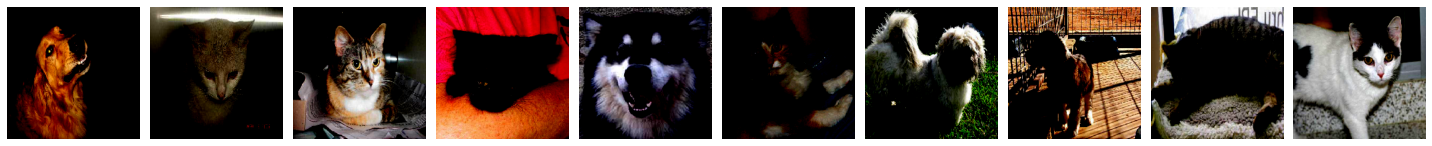

In [10]:
plotImages(imgs)
# the images have their colors distorted as they have been preprocessed 
# so that they can be used for more smooth training.

In [11]:
print(labels)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [12]:
model_own = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])


In [13]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)


Epoch 1/20
100/100 - 239s - loss: 0.7086 - accuracy: 0.5600 - val_loss: 0.6331 - val_accuracy: 0.6400 - 239s/epoch - 2s/step
Epoch 2/20
100/100 - 6s - loss: 0.5587 - accuracy: 0.7150 - val_loss: 0.6758 - val_accuracy: 0.6050 - 6s/epoch - 62ms/step
Epoch 3/20
100/100 - 6s - loss: 0.4571 - accuracy: 0.7980 - val_loss: 0.6175 - val_accuracy: 0.6500 - 6s/epoch - 62ms/step
Epoch 4/20
100/100 - 6s - loss: 0.3827 - accuracy: 0.8460 - val_loss: 0.6384 - val_accuracy: 0.6650 - 6s/epoch - 62ms/step
Epoch 5/20
100/100 - 6s - loss: 0.2973 - accuracy: 0.9140 - val_loss: 0.6231 - val_accuracy: 0.6850 - 6s/epoch - 62ms/step
Epoch 6/20
100/100 - 6s - loss: 0.2172 - accuracy: 0.9540 - val_loss: 0.6254 - val_accuracy: 0.6950 - 6s/epoch - 62ms/step
Epoch 7/20
100/100 - 6s - loss: 0.1517 - accuracy: 0.9840 - val_loss: 0.6574 - val_accuracy: 0.7100 - 6s/epoch - 62ms/step
Epoch 8/20
100/100 - 6s - loss: 0.1120 - accuracy: 0.9900 - val_loss: 0.7156 - val_accuracy: 0.6550 - 6s/epoch - 62ms/step
Epoch 9/20
100

In [15]:
# Download model - Internet connection needed for the first time
mobile_new = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [16]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [17]:
# adding layers
x = mobile_new.layers[-6].output
output = Dense(units=2, activation='softmax')(x) 

In [18]:
Models = Model(inputs=mobile_new.input, outputs=output)


In [19]:
for layer in Models.layers[:-23]: # there are 88 layers and want to only train the last 23 layers
    layer.trainable = False

In [20]:
Models.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [32]:
Models.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
Models.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15


InvalidArgumentError: ignored

In [23]:
prediction_new = Models.predict(x=test_batches, verbose=0)
prediction_new[0]

array([[[0.16719566, 0.8328043 ],
        [0.14987044, 0.85012954],
        [0.36208475, 0.6379152 ],
        [0.9984717 , 0.00152836],
        [0.99295783, 0.00704218],
        [0.60494316, 0.39505687],
        [0.5873161 , 0.4126839 ]],

       [[0.41689357, 0.5831064 ],
        [0.05558278, 0.9444172 ],
        [0.8142858 , 0.18571417],
        [0.9574771 , 0.0425229 ],
        [0.7805835 , 0.21941642],
        [0.5729937 , 0.42700627],
        [0.72524244, 0.2747576 ]],

       [[0.3450241 , 0.6549759 ],
        [0.14880228, 0.8511977 ],
        [0.6168331 , 0.38316688],
        [0.5904274 , 0.40957266],
        [0.99508864, 0.00491135],
        [0.9680857 , 0.03191425],
        [0.7233501 , 0.2766499 ]],

       [[0.18763088, 0.8123691 ],
        [0.2735844 , 0.7264156 ],
        [0.98491955, 0.01508045],
        [0.98990345, 0.01009659],
        [0.9269297 , 0.07307036],
        [0.23660712, 0.76339287],
        [0.12364273, 0.8763573 ]],

       [[0.4443387 , 0.55566126],
      

In [ ]:
# Since the value at 0th index is closer to 1 that means  model predicted cat as the class of the image.

In [31]:
Models.save("MyDrive/Dataset/Models/cats_dogs_classifier.h5")